<a href="https://colab.research.google.com/github/yenirsmwati/KFC-Analysis/blob/main/Wordcloud_Sentiment_KFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
filepath1 = r"/content/data_kfc_sentiment.csv"
sentiment_kfc= pd.read_csv(filepath1,encoding='ISO-8859-1')

In [3]:
filepath2 = r"/content/data_mcd_sentiment.csv"
sentiment_mcd= pd.read_csv(filepath2,encoding='ISO-8859-1')

In [4]:
filepath3= r"/content/data_burger_sentiment.csv"
sentiment_burger= pd.read_csv(filepath3,encoding='ISO-8859-1')

In [5]:
sentiment_count_kfc = sentiment_kfc['sentiment'].value_counts().sort_index()

In [6]:
sentiment_count_mcd = sentiment_mcd['sentiment'].value_counts().sort_index()

In [7]:
sentiment_count_burger = sentiment_burger['sentiment'].value_counts().sort_index()

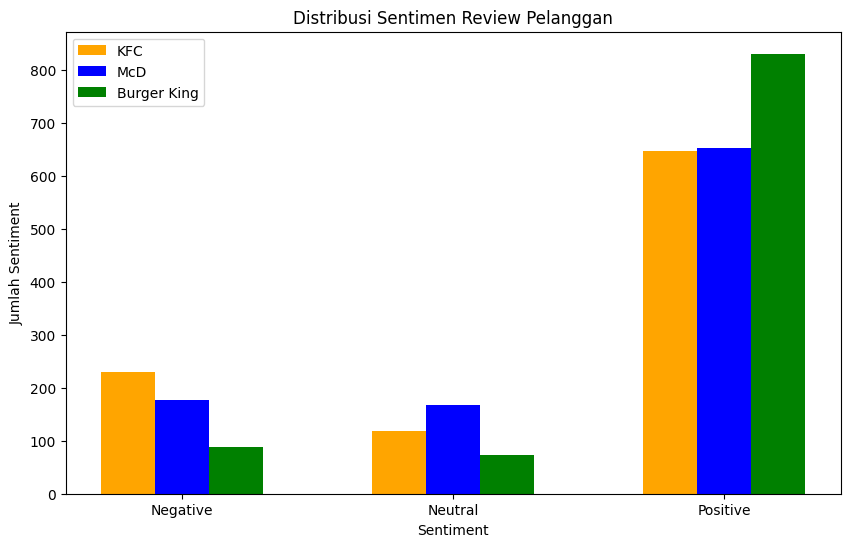

In [8]:
categories = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(categories))  # [0, 1, 2]

# Ambil nilai sesuai kategori (agar selaras dengan urutan 'categories')
values_kfc = [sentiment_count_kfc.get(cat, 0) for cat in categories]
values_mcd = [sentiment_count_mcd.get(cat, 0) for cat in categories]
values_burger = [sentiment_count_burger.get(cat, 0) for cat in categories]

plt.figure(figsize=(10,6))

plt.bar(x - 0.2, values_kfc, width=0.2, label='KFC', color='orange')
plt.bar(x, values_mcd, width=0.2, label='McD', color='blue')
plt.bar(x + 0.2, values_burger, width=0.2, label='Burger King', color='green')

plt.xlabel("Sentiment")
plt.ylabel("Jumlah Sentiment")
plt.title("Distribusi Sentimen Review Pelanggan")
plt.xticks(x, categories)
plt.legend()

plt.show()

# Worcloud

In [9]:
#!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


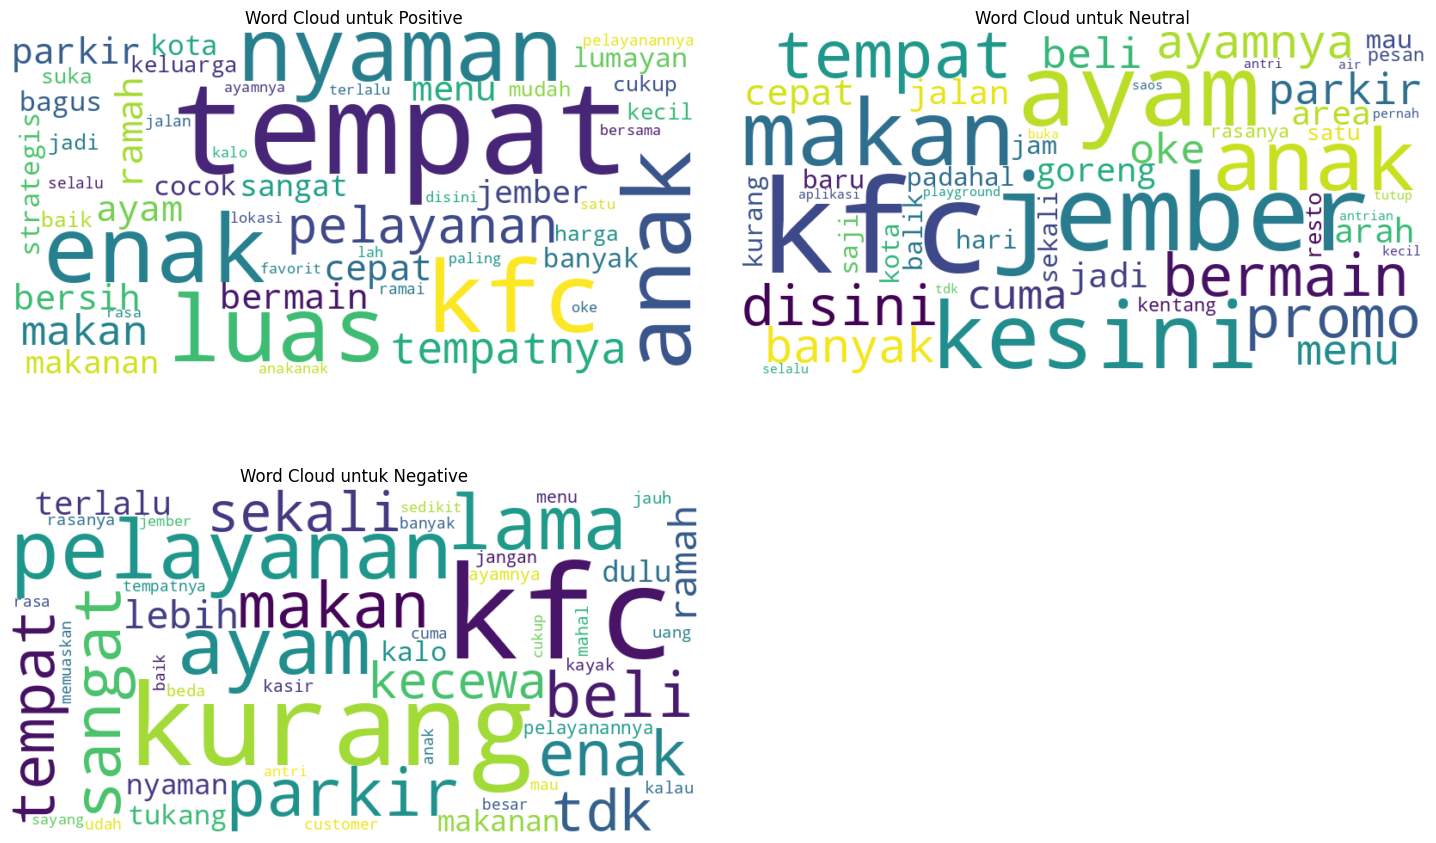

In [11]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stopword remover dan stemmer
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

# Menambah stopwords kustom
additional_stopwords = {
    'yg', 'dgn', 'nya', 'utk', 'jg', 'sdh', 'aja', 'klo', 'gak', 'ga',
    'krn', 'kyk', 'trs', 'gitu', 'nih', 'sih', 'nya', 'dah', 'tau',
    'tuh', 'saat', 'kan', 'kek', 'emg', 'bgt', 'dong', 'udh', 'bikin',
    'karna', 'pas', 'buat', 'uda', 'kali', 'dari', 'sama', 'banget'
}
stopwords.extend(additional_stopwords)

def clean_text(text):
    # Case folding
    text = text.lower()

    # Hapus karakter khusus dan angka
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Hapus multiple spaces
    text = re.sub(r'\s+', ' ', text)

    # Hapus stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]

    return ' '.join(words)

# Daftar kategori
labels = sentiment_kfc['sentiment'].unique()

# Pengaturan visualisasi
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)

    # Menggabungkan dan membersihkan teks
    category_text = ' '.join(sentiment_kfc[sentiment_kfc['sentiment'] == label]['snippet'])
    cleaned_text = clean_text(category_text)

    # Membuat Word Cloud dengan pengaturan yang lebih spesifik
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_font_size=10,
        max_font_size=150,
        max_words=50,  # Membatasi jumlah kata
        collocations=False,  # Menghindari pengulangan
        normalize_plurals=True,
        regexp=r"\w+",  # Hanya mengambil kata-kata
        min_word_length=3  # Minimal panjang kata
    ).generate(cleaned_text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk {label.capitalize()}')

plt.tight_layout(pad=3.0)  # Menambah padding antar subplot
plt.show()

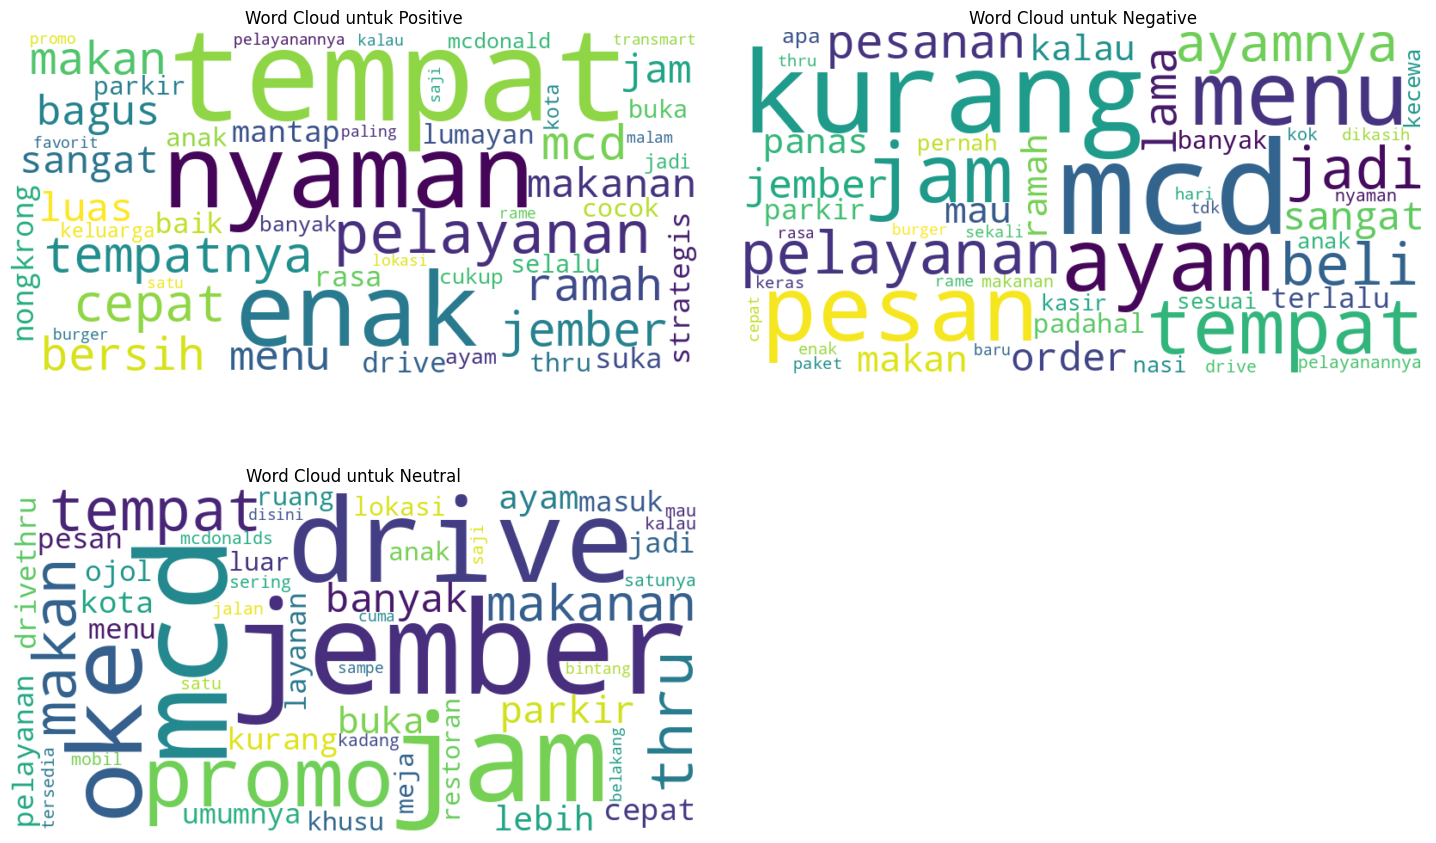

In [12]:
# Daftar kategori
labels = sentiment_mcd['sentiment'].unique()

# Pengaturan visualisasi
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)

    # Menggabungkan dan membersihkan teks
    category_text = ' '.join(sentiment_mcd[sentiment_mcd['sentiment'] == label]['snippet'])
    cleaned_text = clean_text(category_text)

    # Membuat Word Cloud dengan pengaturan yang lebih spesifik
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_font_size=10,
        max_font_size=150,
        max_words=50,  # Membatasi jumlah kata
        collocations=False,  # Menghindari pengulangan
        normalize_plurals=True,
        regexp=r"\w+",  # Hanya mengambil kata-kata
        min_word_length=3  # Minimal panjang kata
    ).generate(cleaned_text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk {label.capitalize()}')

plt.tight_layout(pad=3.0)  # Menambah padding antar subplot
plt.show()

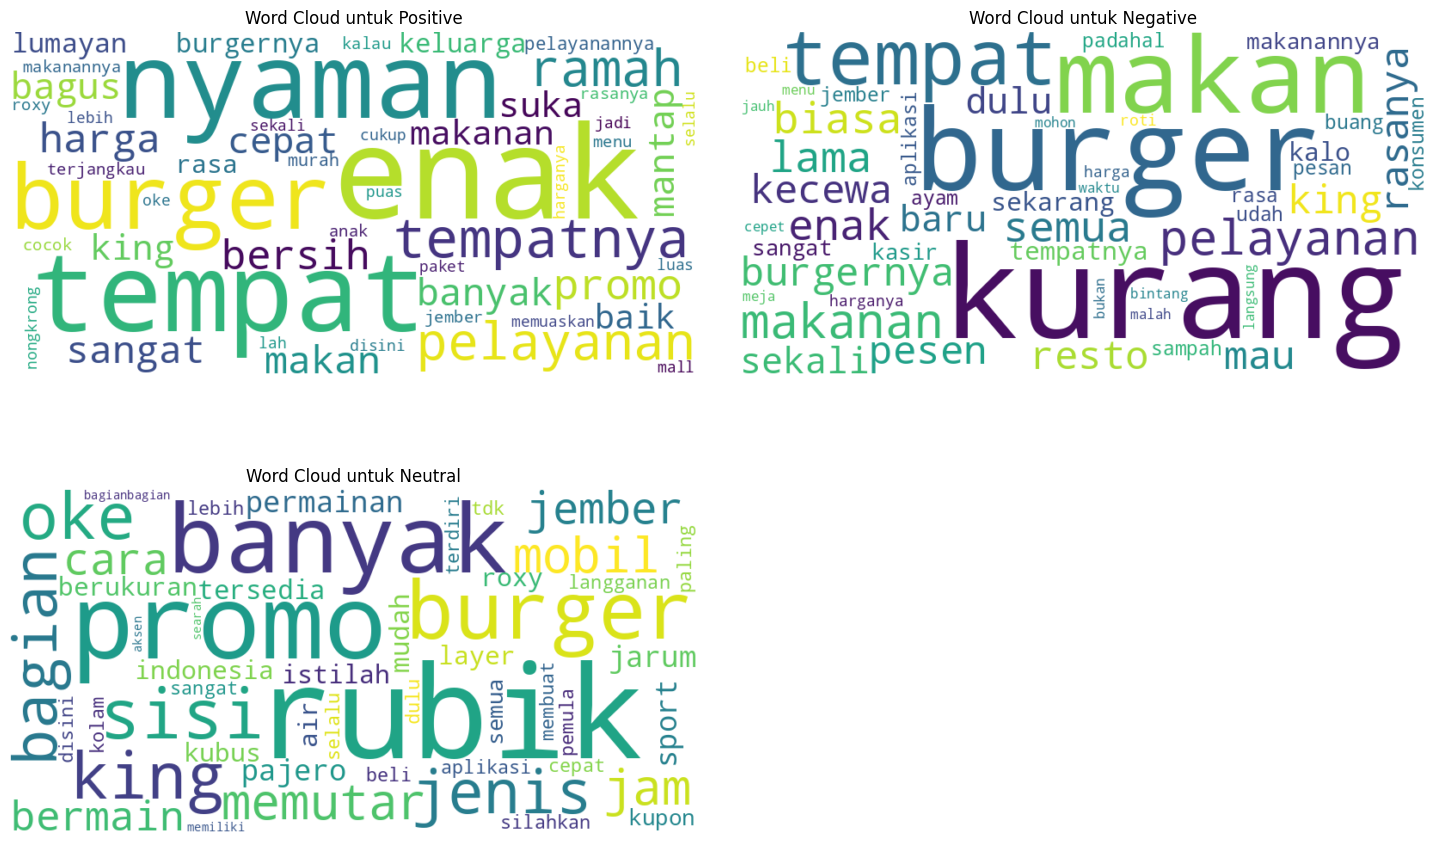

In [13]:
# Daftar kategori
labels = sentiment_burger['sentiment'].unique()

# Pengaturan visualisasi
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels):
    plt.subplot(2, 2, i + 1)

    # Menggabungkan dan membersihkan teks
    category_text = ' '.join(sentiment_burger[sentiment_burger['sentiment'] == label]['snippet'])
    cleaned_text = clean_text(category_text)

    # Membuat Word Cloud dengan pengaturan yang lebih spesifik
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_font_size=10,
        max_font_size=150,
        max_words=50,  # Membatasi jumlah kata
        collocations=False,  # Menghindari pengulangan
        normalize_plurals=True,
        regexp=r"\w+",  # Hanya mengambil kata-kata
        min_word_length=3  # Minimal panjang kata
    ).generate(cleaned_text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk {label.capitalize()}')

plt.tight_layout(pad=3.0)  # Menambah padding antar subplot
plt.show()